#### Import the required libraries

In [340]:
!pip3 install mlxtend

In [341]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import function to perform linear regression using OLS
import statsmodels.api as sm

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform cross validation
from sklearn.model_selection import cross_val_score

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

from sklearn.metrics import r2_score

#### Read the data

Load the csv file and print the first five observations.

In [342]:
# read the data
df_fish = pd.read_csv("Fish_data.csv")

# display the first five rows of the data
df_fish.head()

,Species,color,Width,V_length,D_length,C_length,Height,Weight,price
0,Good,D,1.01,6.18,6.26,4.01,64.5,58.0,4606
1,Ideal,F,0.42,4.84,4.87,2.96,61.0,57.0,1031
2,Ideal,E,0.91,6.19,6.27,3.85,61.8,56.0,4160
3,Very Good,H,1.17,6.76,6.71,4.25,63.1,56.0,4652
4,Very Good,F,0.33,4.43,4.46,2.75,62.0,56.0,912


Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**Species:** Species of a fish

**color**: Fish color

**Width:** Diagonal width of a fish

**V_length:** Vertical length of a fish

**D_length:** Diagonal length of a fish

**C_length:** Cross length of a fish

**Height:** Height of a fish

**Weight:** Weight of a fish (target/dependent variable)

**price**: Price of a fish in US dollars (target/dependent variable)

### Let's begin with some hands-on practice exercises

In [343]:
df_fish.columns

Index(['Species', 'color', 'Width', 'V_length', 'D_length', 'C_length',
       'Height', 'Weight', 'price'],
      dtype='object')

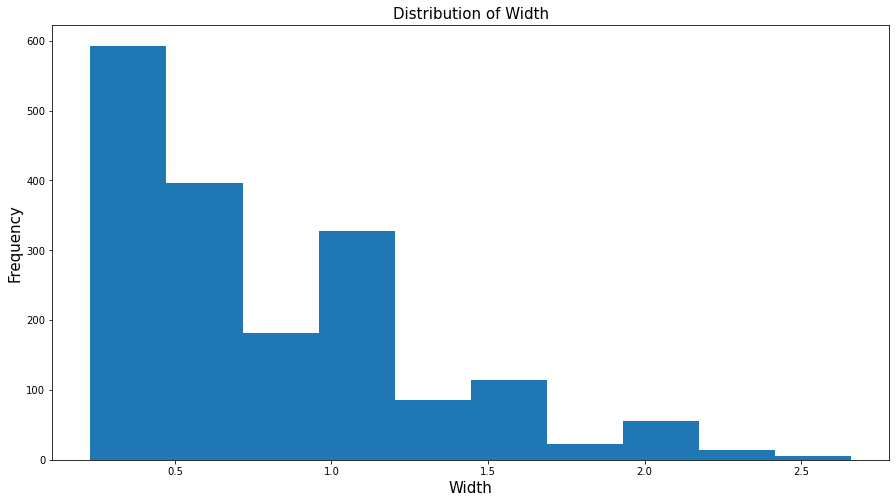

In [344]:
# plot histogram
plt.hist(df_fish['Width'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of Width', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('Width', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

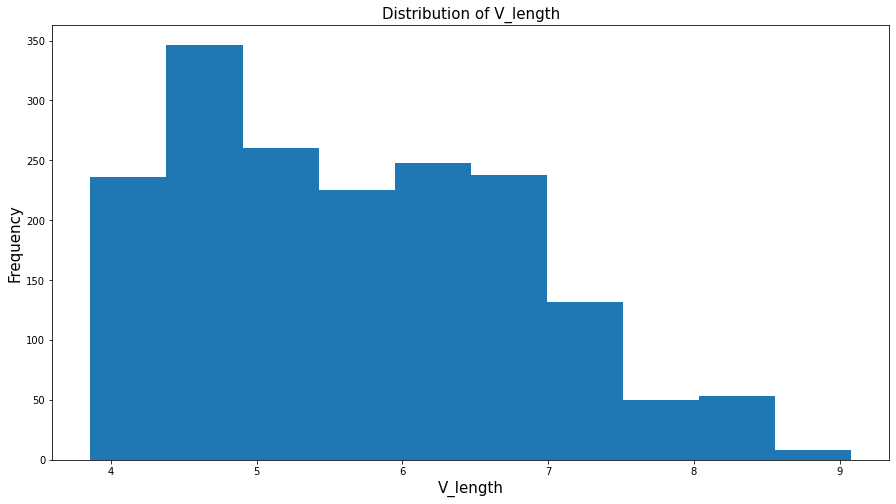

In [345]:
# plot histogram
plt.hist(df_fish['V_length'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of V_length', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('V_length', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

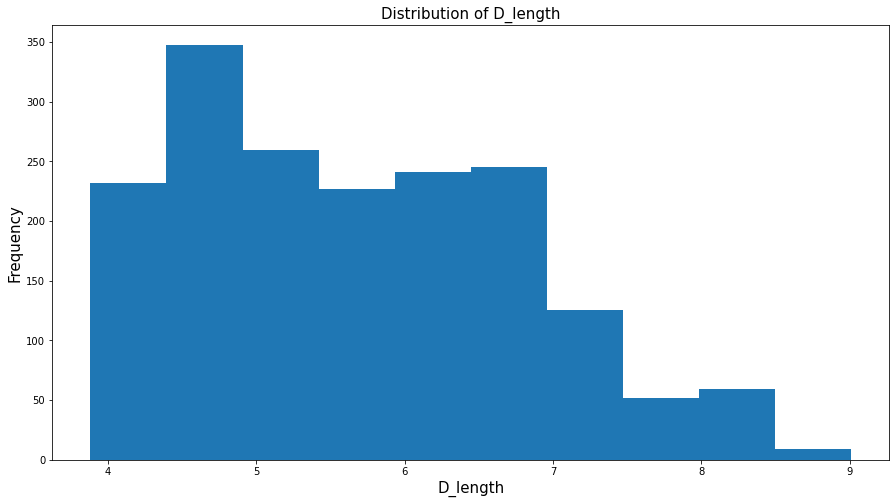

In [346]:
# plot histogram
plt.hist(df_fish['D_length'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of D_length', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('D_length', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

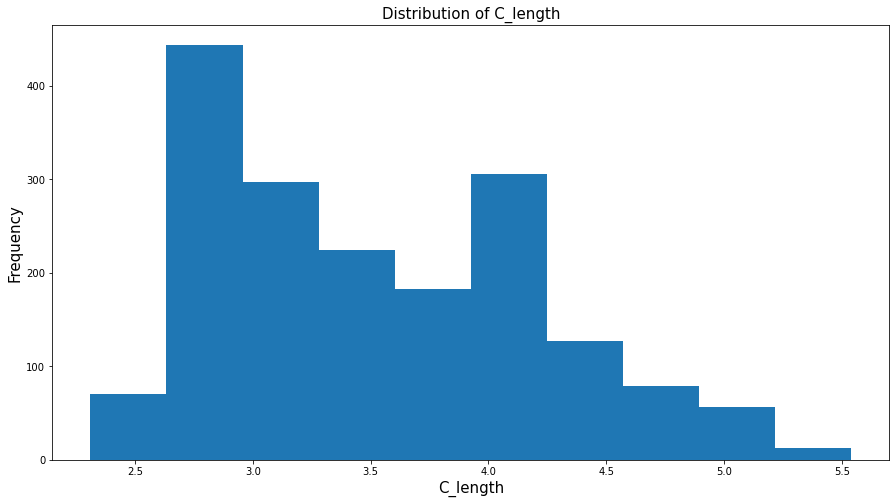

In [347]:
# plot histogram
plt.hist(df_fish['C_length'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of C_length', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('C_length', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

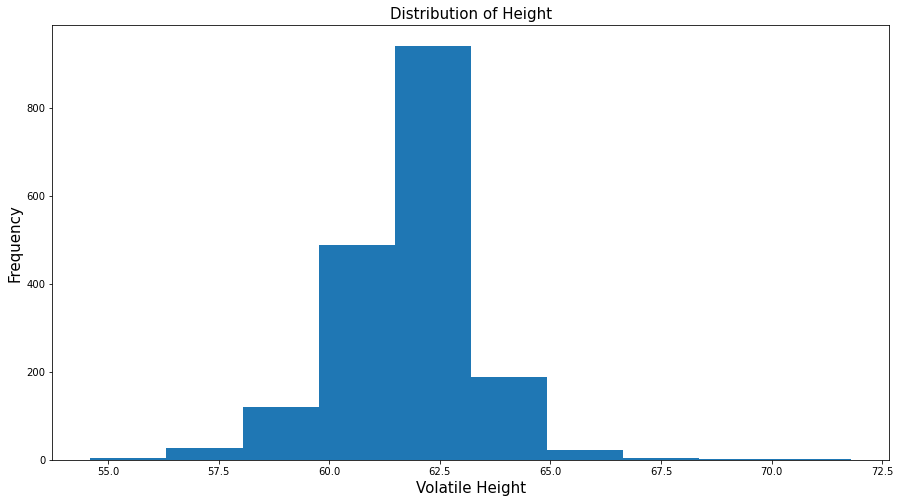

In [348]:
# plot histogram
plt.hist(df_fish['Height'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of Height', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('Volatile Height', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

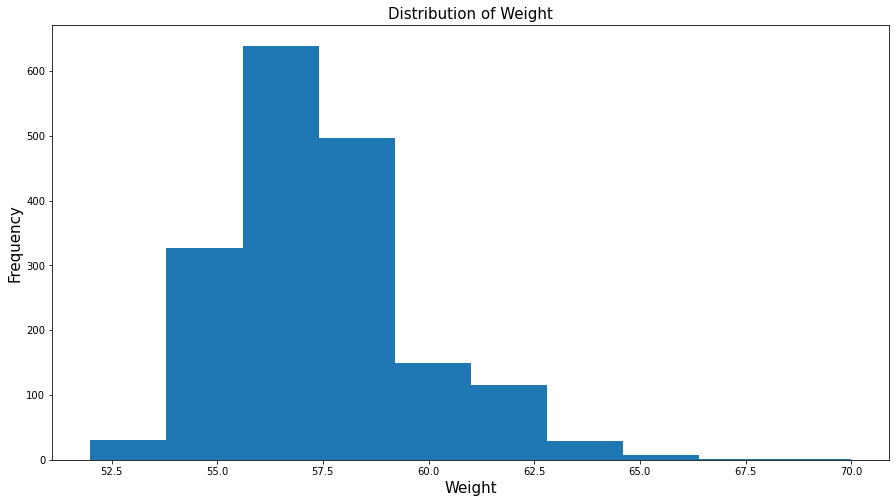

In [349]:
# plot histogram
plt.hist(df_fish['Weight'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of Weight', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('Weight', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

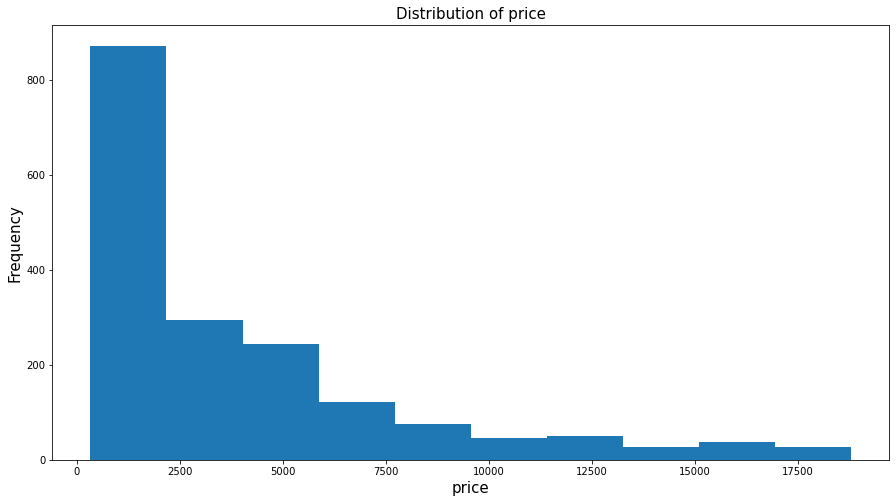

In [350]:
# plot histogram
plt.hist(df_fish['price'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of price', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('price', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [351]:
# consider the independent variables
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_num = df_fish.select_dtypes(include=np.number).drop(["price"],axis=1)

In [352]:
# initialize the standard scalar
num_scaler = StandardScaler()

# standardize all the columns of the dataframe 'df_num'
num_scaled = num_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the reqired column names to the parameter, 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

## Is the variable representing the diagonal length of a fish skewed? If yes, apply an appropriate technique to make the distribution less skewed

Skewness:  0.4495441121781921


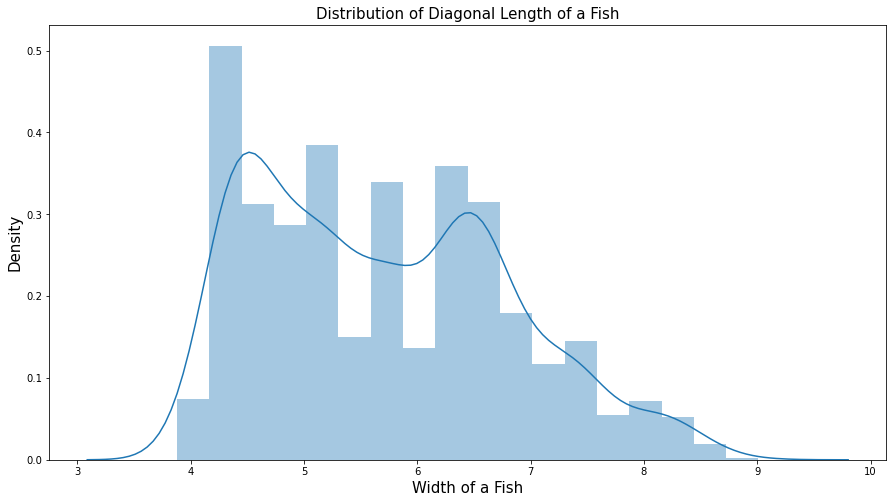

In [353]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# check the skewness of variable y by plotting distplot 
sns.distplot(df_fish['D_length'])

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Diagonal Length of a Fish', fontsize = 15)
plt.xlabel('Width of a Fish', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# check the skewness numerically
# print the skewness of the variable 
print("Skewness: ", df_fish['D_length'].skew())

Apply the log transformation to the variable 'y'.

In [354]:
# apply log transformation
trans_D = np.log(df_fish['D_length'])

# check the skewness numerically
# print the skewness of the variable 
print("Skewness: ", trans_D.skew())

Skewness:  0.1626626172767051


The coefficient of skewness shows that the skewness of the variable is reduced.

## Check the skewness of all of the variable 

In [355]:
df_num_scaled.describe()

,Width,V_length,D_length,C_length,Height,Weight
count,1.796000e+03,1.796000e+03,1.796000e+03,1.796000e+03,1.796000e+03,1.796000e+03
mean,-7.267294e-17,-6.040624e-16,-4.114192e-16,3.706745e-16,7.811124e-16,-5.713074e-16
std,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00
min,-1.173940e+00,-1.640109e+00,-1.638207e+00,-1.750986e+00,-5.012457e+00,-2.419720e+00
25%,-8.156812e-01,-8.930949e-01,-8.865350e-01,-8.980749e-01,-5.189587e-01,-6.309498e-01
50%,-1.834593e-01,-6.604404e-02,-5.857362e-02,-3.070720e-02,1.129395e-01,-1.837573e-01
75%,5.119847e-01,7.343277e-01,7.222680e-01,7.354676e-01,5.342050e-01,7.106278e-01
max,3.947057e+00,3.002048e+00,2.966066e+00,2.918343e+00,7.063820e+00,5.629746e+00


In [356]:
for i in range(df_num_scaled.shape[1]):
    print('Skewness for %s is %d' , df_num_scaled.columns[i] , df_num_scaled.iloc[:,i].skew())
    print('Kurtosis for %s is %d' , df_num_scaled.columns[i] , df_num_scaled.iloc[:,i].kurtosis())

Skewness for %s is %d Width 1.1270013626419264
Kurtosis for %s is %d Width 0.9294286474701865
Skewness for %s is %d V_length 0.44789610361594484
Kurtosis for %s is %d V_length -0.6962298381843364
Skewness for %s is %d D_length 0.44954411217819357
Kurtosis for %s is %d D_length -0.6966224112749781
Skewness for %s is %d C_length 0.45181364453989653
Kurtosis for %s is %d C_length -0.6863144602905016
Skewness for %s is %d Height -0.028890553318822666
Kurtosis for %s is %d Height 3.882689593973838
Skewness for %s is %d Weight 0.6444557523635235
Kurtosis for %s is %d Weight 0.9461951728109774


In [357]:
df_num_scaled.columns

Index(['Width', 'V_length', 'D_length', 'C_length', 'Height', 'Weight'], dtype='object')

In [358]:
# apply log transformation
df_num_scaled['Width'] = np.log(df_fish['Width'])
df_num_scaled['V_length'] = np.log(df_fish['V_length'])
df_num_scaled['D_length'] = np.log(df_fish['D_length'])
df_num_scaled['C_length'] = np.log(df_fish['C_length'])
df_num_scaled['Weight'] = np.log(df_fish['Weight'])

In [359]:
for i in range(df_num_scaled.shape[1]):
    print('Skewness for %s is %d' , df_num_scaled.columns[i] , df_num_scaled.iloc[:,i].skew())
    print('Kurtosis for %s is %d' , df_num_scaled.columns[i] , df_num_scaled.iloc[:,i].kurtosis())

Skewness for %s is %d Width 0.1538725343558522
Kurtosis for %s is %d Width -1.0513769978784253
Skewness for %s is %d V_length 0.1581046448465551
Kurtosis for %s is %d V_length -1.0391499307079313
Skewness for %s is %d D_length 0.1626626172767051
Kurtosis for %s is %d D_length -1.0381319332781551
Skewness for %s is %d C_length 0.16171029555571675
Kurtosis for %s is %d C_length -1.0339077194395159
Skewness for %s is %d Height -0.028890553318822666
Kurtosis for %s is %d Height 3.882689593973838
Skewness for %s is %d Weight 0.5060834735073809
Kurtosis for %s is %d Weight 0.5675577934204918


In [360]:
# consider all the categorical variables in the data
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
df_cat = df_fish.select_dtypes(include="object")

In [361]:
# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
dummy_variables = pd.get_dummies(df_cat, drop_first=True)

In [362]:
# concatenate the numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_num_scaled, dummy_variables],axis=1)

Skewness:  1.688153289960618


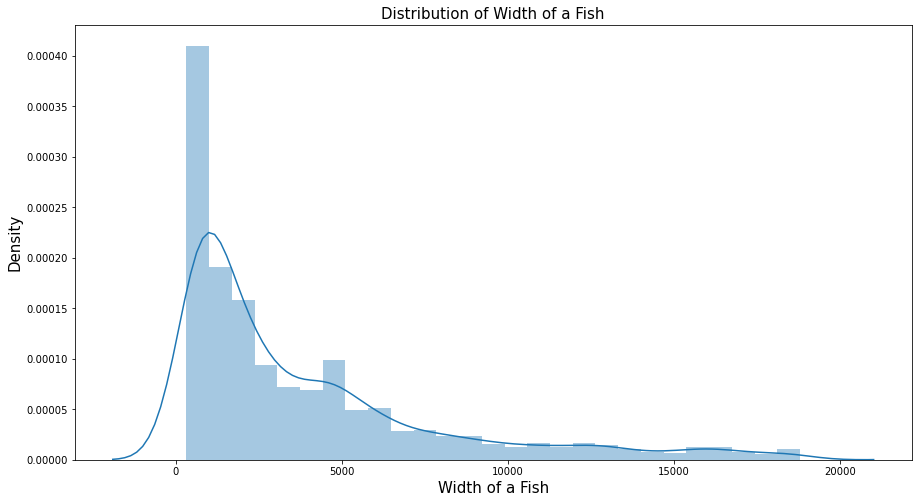

In [363]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# check the skewness of variable y by plotting distplot 
sns.distplot(df_fish["price"])

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Width of a Fish', fontsize = 15)
plt.xlabel('Width of a Fish', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# check the skewness numerically
# print the skewness of the variable 
print("Skewness: ", df_fish["price"].skew())

In [364]:
# consider the target variable
df_target = df_fish["price"]
# standardize the target variable explicitly 
y = np.log(df_target)
y = (y - y.mean()) / y.std()

Skewness:  0.175546632121324


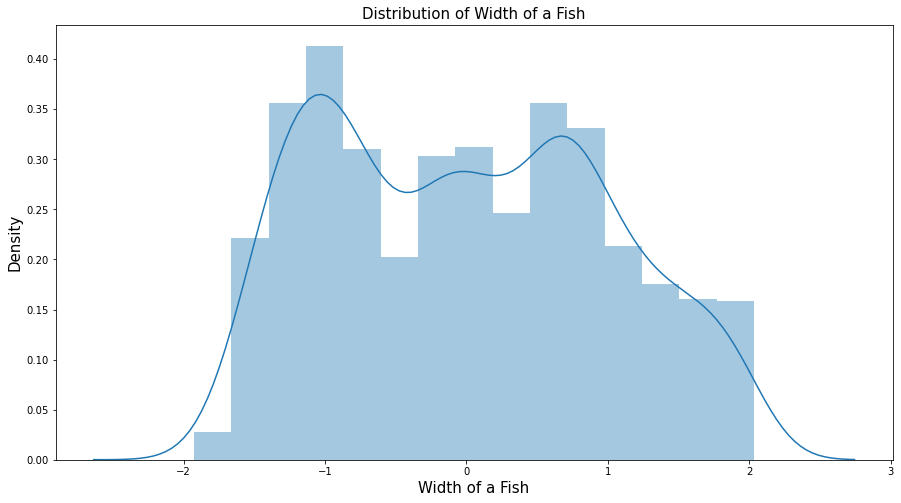

In [365]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# check the skewness of variable y by plotting distplot 
sns.distplot(y)

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Width of a Fish', fontsize = 15)
plt.xlabel('Width of a Fish', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# check the skewness numerically
# print the skewness of the variable 
print("Skewness: ", y.skew())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Build a full Model

In [366]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

# fit a full model with an intercept using fit()
# add_constant(): adds the intercept term to the model
MLR_model_full = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_model_full.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              1801.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                        12:58:49   Log-Likelihood:                          157.04
No. Observations:                1436   AIC:                                     -282.1
Df Residuals:                    1420   BIC:                                     -197.8
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [367]:
y_test_pred = MLR_model_full.predict(X_test)
MLR_model_full_CD = r2_score(y_test,y_test_pred)
MLR_model_full_CD 

0.9563074165297051

In [368]:
# compute RMSE on test data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
MLR_model_full_RMSE =  np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE on test set:',MLR_model_full_RMSE )

RMSE on test set: 0.20737560439555514


From the above summary, we can observe that the value obtained from the Durbin-Watson test statistic is close to 2 (=1.970). Thus, we conclude that there is no autocorrelation.

## Check for consistency of the model

In [369]:
# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing linear regression
# pass the X_train and y_train sets
# cv: stands for number of subsets
# scoring: pass the scoring parameter, 'r2' for R-squared 
scores = cross_val_score(estimator = LinearRegression(), X = X_train, y = y_train, cv = 4, scoring = 'r2')

# print the coefficient of determination for each model
scores

array([0.94639046, 0.95354152, 0.95130423, 0.95381917])

## Check for multicollinearity in the data

Use the train and test set obtained in Q1.

In [370]:
# fit a model with an intercept using fit()
# add_constant(): adds the intercept term to the model
MLR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              1801.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                        12:58:49   Log-Likelihood:                          157.04
No. Observations:                1436   AIC:                                     -282.1
Df Residuals:                    1420   BIC:                                     -197.8
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

The 'Cond. No' (= 178) represents the `Condition Number (CN)` which is used to check the multicollinearity. 

If CN < 100: no multicollinearity<br>
If CN is between 100 and 1000: moderate multicollinearity<br>
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is moderate multicollinearity in the data.

## If Multi collinearity extists resolve the issue

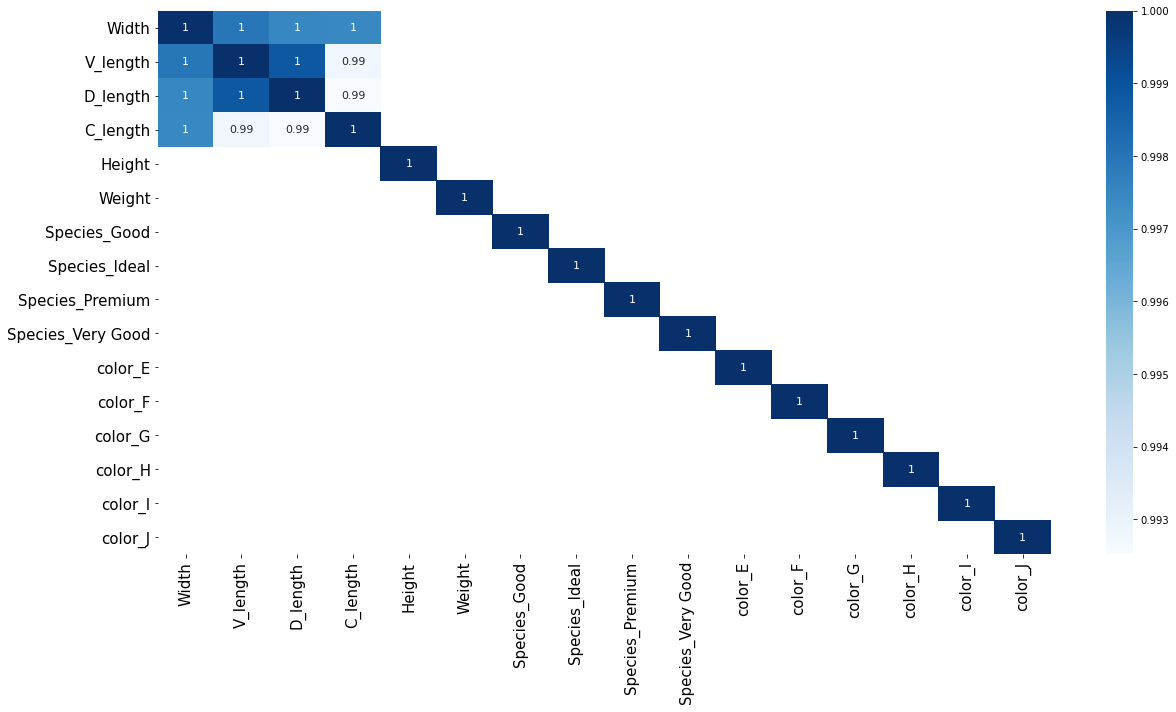

In [371]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# 'cmap' maps correlation values to color space
sns.heatmap(X.corr()[np.abs(X.corr()) > 0.6], annot = True, annot_kws = {"size": 11}, cmap = 'Blues')

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

In [372]:
# filter the numerical features in the dataset
df_numeric_features = X.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features.head()

,Width,V_length,D_length,C_length,Height,Weight,Species_Good,Species_Ideal,Species_Premium,Species_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,0.009950,1.821318,1.834180,1.388791,1.938423,4.060443,1,0,0,0,0,0,0,0,0,0
1,-0.867501,1.576915,1.583094,1.085189,-0.518959,4.043051,0,1,0,0,0,1,0,0,0,0
2,-0.094311,1.822935,1.835776,1.348073,0.042729,4.025352,0,1,0,0,1,0,0,0,0,0
3,0.157004,1.911023,1.903599,1.446919,0.955470,4.025352,0,0,0,1,0,0,0,1,0,0
4,-1.108663,1.488400,1.495149,1.011601,0.183150,4.025352,0,0,0,1,0,1,0,0,0,0


In [373]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features.values, i) for i in range(df_numeric_features.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features.columns

# print the dataframe 
vif

,VIF_Factor,Features
0,639.700352,Width
1,125473.816861,V_length
2,186873.703401,D_length
3,335019.336437,C_length
4,92.309810,Height
5,16394.523487,Weight
6,5.132265,Species_Good
7,21.035978,Species_Ideal
8,13.072518,Species_Premium
9,11.851958,Species_Very Good


In [374]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features.values, i) for i in range(df_numeric_features.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the theshold other than 10 (it dependes on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features = df_numeric_features.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor           Features
0     1.655583              Width
1     1.096407             Height
2     1.560409       Species_Good
3     3.709757      Species_Ideal
4     2.693012    Species_Premium
5     2.460602  Species_Very Good
6     2.125580            color_E
7     2.123445            color_F
8     2.347934            color_G
9     2.038076            color_H
10    1.622325            color_I
11    1.412353            color_J


In [375]:
# filter the numerical features in the dataset
df_numeric_features = X[['Width', 'Height', 'Species_Good', 'Species_Ideal', 'Species_Premium', 'Species_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']]

# display the first five observations
df_numeric_features.head()

,Width,Height,Species_Good,Species_Ideal,Species_Premium,Species_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,0.009950,1.938423,1,0,0,0,0,0,0,0,0,0
1,-0.867501,-0.518959,0,1,0,0,0,1,0,0,0,0
2,-0.094311,0.042729,0,1,0,0,1,0,0,0,0,0
3,0.157004,0.955470,0,0,0,1,0,0,0,1,0,0
4,-1.108663,0.183150,0,0,0,1,0,1,0,0,0,0


In [376]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features.values, i) for i in range(df_numeric_features.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features.columns

# print the dataframe 
vif

,VIF_Factor,Features
0,1.655583,Width
1,1.096407,Height
2,1.560409,Species_Good
3,3.709757,Species_Ideal
4,2.693012,Species_Premium
5,2.460602,Species_Very Good
6,2.125580,color_E
7,2.123445,color_F
8,2.347934,color_G
9,2.038076,color_H


## Construct the Full Model again

In [377]:
X = X[['Width', 'Height', 'Species_Good', 'Species_Ideal', 'Species_Premium', 'Species_Very Good', 
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']]

In [378]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

# fit a full model with an intercept using fit()
# add_constant(): adds the intercept term to the model
MLR_model_full_WO_MC = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_model_full_WO_MC.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              2043.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                        12:58:52   Log-Likelihood:                          44.935
No. Observations:                1436   AIC:                                     -65.87
Df Residuals:                    1424   BIC:                                     -2.635
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

## Check, whether the Residuals follow Normal Distriution or not?

In [379]:
# print the summary of full model from Q2
print(MLR_model_full_WO_MC.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              2043.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                        12:58:52   Log-Likelihood:                          44.935
No. Observations:                1436   AIC:                                     -65.87
Df Residuals:                    1424   BIC:                                     -2.635
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

## Model Evaluation

### Coefficient of Determination (R-Squared)

In [380]:
y_test_pred = MLR_model_full_WO_MC.predict(X_test)
MLR_model_full_WO_MC_CD = r2_score(y_test,y_test_pred)
MLR_model_full_WO_MC_CD 

0.9477760593821606

### RMSE

In [381]:
# compute RMSE on test data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
MLR_model_full_WO_MC_RMSE =  np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE on test set:',MLR_model_full_WO_MC_RMSE )

RMSE on test set: 0.2267193678322271


Plot a Q-Q plot, to check the normality of the residuals.

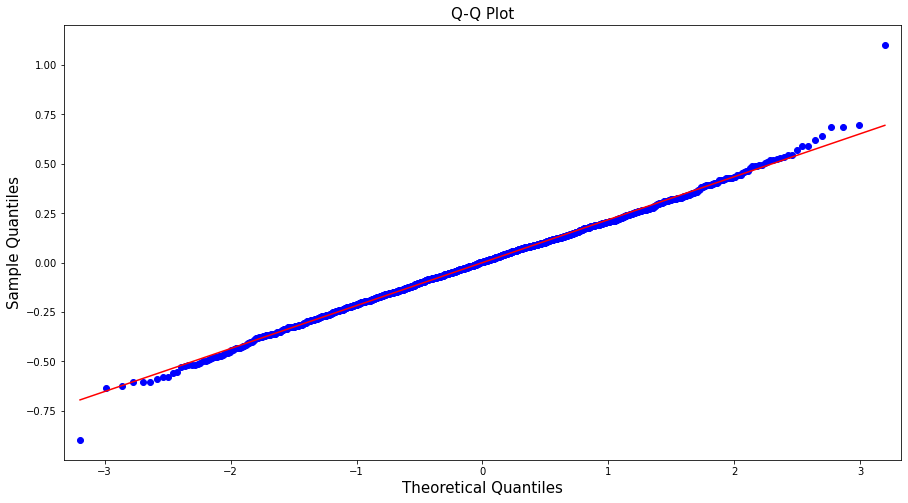

In [382]:
# set the plot size using 'rcParams'
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
# 'resid' returns the residuals 
qqplot(MLR_model_full.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

As, the blue points are varying from the regression line, we can say that the residuals are not normal.

Skewness of the residuals:  0.0365392294681385


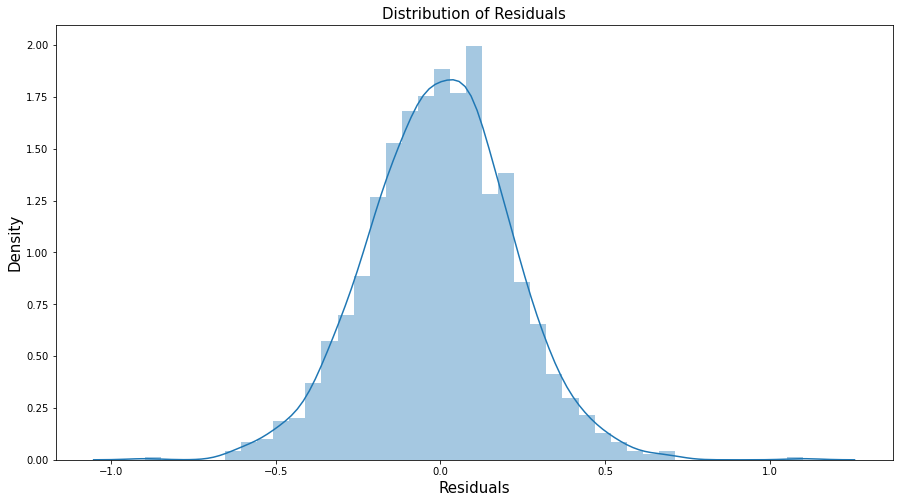

In [383]:
# plot a distplot for the residuals
sns.distplot(MLR_model_full.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model_full.resid.skew())

## Consider only the diagonal width of the fish and construct a linear regression.

In [384]:
# consider the variable 'Width' from 'X_train'
X_train_width = X_train['Width']

# fit a model with an intercept using fit()
# add_constant(): adds the intercept term to the model
MLR_WIDTH_full = sm.OLS(y_train, sm.add_constant(X_train_width)).fit()

# print the summary output
print(MLR_WIDTH_full.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 2.213e+04
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:58:52   Log-Likelihood:                -28.638
No. Observations:                1436   AIC:                             61.28
Df Residuals:                    1434   BIC:                             71.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6849      0.008     84.978      0.0

Considering only the width, we see that the variable contributes to 84.6% of variation in the weight of a fish. 

Interpretation of β coefficients:

β<sub>const</sub> = -0.0181, represents the weight of a fish considering the width to be 0  <br>

β<sub>Width</sub> = 0.8209, it implies that 0.8209 is the average increase in the weight of a fish due to one unit increase in the width.

In [385]:
y_test_pred = MLR_WIDTH_full.predict(sm.add_constant(X_test['Width']))

In [386]:
# compute RMSE on test data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
width_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE on test set:', width_RMSE)

RMSE on test set: 0.24174257017711226


In [387]:
width_CD = r2_score(y_test,y_test_pred)
width_CD

0.9406256777374217

# Forward Selection

In [388]:
# Build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
! pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True,
                     verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

# feature names of the selected feature subsets
sfs_forward.k_feature_names_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2020-11-28 12:58:53] Features: 1/12 -- score: 0.9387047625388785[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2020-11-28 12:58:53] Features: 2/12 -- score: 0.9437417660171228[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2020-11-28 12:58:53] Features: 3/12 -- score: 0.9471158797650597[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

('Width',
 'Height',
 'Species_Good',
 'Species_Ideal',
 'Species_Premium',
 'Species_Very Good',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J')

The above output returns the best predictors that can be used to predict the price of a diamond.

In [389]:
sfs_forward

SequentialFeatureSelector(estimator=LinearRegression(), k_features='best',
                          scoring='r2', verbose=2)

In [390]:
# print the selected feature names when k_features = 14
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('Width', 'Height', 'Species_Good', 'Species_Ideal', 'Species_Premium', 'Species_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J')

R-Squared:  0.9518717432551774


In [391]:
# store the X_train with significant variables in new_X_train
new_X_train = X_train[['Width', 'Height', 'Species_Good', 'Species_Ideal', 'Species_Premium', 'Species_Very Good', 
                       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']]

# initiate linear regression
linreg = LinearRegression()

# build the model using new_X_train and y_train
linreg.fit(new_X_train, y_train)

# check the score
linreg.score(new_X_train, y_train)

0.9528399703456385

In [392]:
y_test_pred = linreg.predict(X_test[['Width', 'Height', 'Species_Good', 'Species_Ideal', 'Species_Premium',
                                     'Species_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']])
FS_CD = r2_score(y_test,y_test_pred)
FS_CD

0.9562488434937118

In [393]:
# compute RMSE on test data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
FS_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE on test set:', FS_RMSE)

RMSE on test set: 0.20751455876319985


# Backward Elimination

In [394]:
# Build step backward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'  
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False,
                     verbose = 2, scoring = 'r2')

# fit the step backward selection on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

# feature names of the selected feature subsets
sfs_backward.k_feature_names_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2020-11-28 12:58:54] Features: 11/1 -- score: 0.95190706145336[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2020-11-28 12:58:54] Features: 10/1 -- score: 0.9519394945243167[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2020-11-28 12:58:54] Features: 9/1 -- score: 0.9519083307971453[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

('Width',
 'Species_Good',
 'Species_Ideal',
 'Species_Premium',
 'Species_Very Good',
 'color_E',
 'color_G',
 'color_H',
 'color_I',
 'color_J')

In [395]:
# print the selected feature names when k_features = 14
print('Features selelected using forward selection are: ')
print(sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selelected using forward selection are: 
('Width', 'Species_Good', 'Species_Ideal', 'Species_Premium', 'Species_Very Good', 'color_E', 'color_G', 'color_H', 'color_I', 'color_J')

R-Squared:  0.9519394945243167


In [396]:
# store the X_train with significant variables in new_X_train
new_X_train = X_train[['Width', 'Species_Good', 'Species_Ideal', 'Species_Premium', 'Species_Very Good', 'color_E', 
                       'color_G', 'color_H', 'color_I', 'color_J']]

# initiate linear regression
linreg = LinearRegression()

# build the model using new_X_train and y_train
linreg.fit(new_X_train, y_train)

# check the score
linreg.score(new_X_train, y_train)

0.9528215102688503

In [397]:
y_test_pred = linreg.predict(X_test[['Width', 'Species_Good', 'Species_Ideal', 'Species_Premium', 'Species_Very Good',
                                     'color_E', 'color_G', 'color_H', 'color_I', 'color_J']])
BE_CD = r2_score(y_test,y_test_pred)
BE_CD

0.9562982587786762

In [398]:
# compute RMSE on test data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
BE_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE on test set:', BE_RMSE)

RMSE on test set: 0.20739733571130625


The output shows the seven most significant features in the dataset. 

# Recursive Feature Elimination

Apply RFE on the dataset to obtain the five features.

In [399]:
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# Build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 5)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Width', 'Species_Ideal', 'color_H', 'color_I', 'color_J'], dtype='object')


Let us build the model using the features obtained above. 

In [400]:
# store the X_train with significant variables in new_X_train
new_X_train = X_train[['Width', 'Species_Ideal', 'color_H', 'color_I', 'color_J']]

# initiate linear regression
linreg_rfe = LinearRegression()

# build the model using new_X_train and y_train
linreg_rfe.fit(new_X_train, y_train)

# check the score
linreg_rfe.score(new_X_train, y_train)

0.9517764142346544

In [401]:
y_test_pred = linreg_rfe.predict(X_test[['Width', 'Species_Ideal', 'color_H', 'color_I', 'color_J']])
linreg_rfe_CD = r2_score(y_test , y_test_pred)
linreg_rfe_CD 

0.9562717565134918

In [402]:
# compute RMSE on test data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
linreg_rfe_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE on test set:', linreg_rfe_RMSE )

RMSE on test set: 0.20746021268109271


# Ridge Regression

In [403]:
# 'alpha' assigns the regularization strength to the model
tuned_paramaters = [{'alpha':[0.00001, 0.001, 0.1, 10, 100]}]
 
# instantiate the Ridge() method
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
ridge_grid = GridSearchCV(estimator = ridge, param_grid = tuned_paramaters, cv = 5)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameter
print('Best parameter for Ridge Regression: ', ridge_grid.best_params_, '\n')

Best parameter for Ridge Regression:  {'alpha': 0.1} 



In [404]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
ridge = Ridge(alpha = 0.1)

# fit the model on train set using fit()
ridge_model = ridge.fit(X_train, y_train)

# predict the values of target variable using test data
y_test_pred = ridge_model.predict(X_test)

In [405]:
# compute RMSE on test data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
RIDGE_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE on test set:', RIDGE_RMSE )

RMSE on test set: 0.20749711631077794


In [406]:
RIDGE_CD  = r2_score(y_test , y_test_pred)
RIDGE_CD 

0.9562561981140171

# Stochastic Gradient Descent

In [407]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_full_model = linreg.fit(X_train, y_train)

# predict the values of target variable using train data
y_train_pred = MLR_full_model.predict(X_train)

# compute RMSE on train data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
print('RMSE on train set:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

# predict the values of target variable using test data
y_test_pred = MLR_full_model.predict(X_test)

# compute RMSE on test data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
print('RMSE on test set:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE on train set: 0.21729661853850463
RMSE on test set: 0.20751455876319985


In [408]:
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 1)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

In [409]:
# predict the values of target variable using test data
y_test_pred = linreg_with_SGD.predict(X_test)

In [410]:
# compute RMSE on test data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
SGD_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE on test set:', SGD_RMSE )

RMSE on test set: 0.21745306562203365


In [411]:
SGD_CD  = r2_score(y_test , y_test_pred)
SGD_CD 

0.9519577361182097

We can observe that the coefficients obtained from the SGD model have smaller values as compared to the values obtained from the linear regression model using OLS.

# Lasso Regression

### Choose Value of alpha

In [412]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.1, 1, 2, 3]}]
                     
# instantiate the lasso() method
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
lasso_grid = GridSearchCV(estimator = lasso, param_grid = tuned_paramaters, cv = 5)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameter for Lasso Regression: ', lasso_grid.best_params_, '\n')

Best parameter for Lasso Regression:  {'alpha': 0.0001} 



In [413]:
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
lasso = Lasso(alpha = 0.0001)

# fit the model on train set using fit()
lasso_model = lasso.fit(X_train, y_train)

The least significant variable will be the one with zero coefficient value.

In [414]:
y_test_pred = lasso_model.predict(X_test)

In [415]:
# compute RMSE on test data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
LASSO_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE on test set:', LASSO_RMSE )

RMSE on test set: 0.20735756680572667


In [416]:
LASSO_CD  = r2_score(y_test , y_test_pred)
LASSO_CD 

0.9563150169861475

# Elastic net model

In [417]:
# create a dictionary with hyperparameters and its values
# 'l1_ratio' is the elastic net mixing parameter
tuned_paramaters = [{"l1_ratio":[0.0001, 0.001, 0.01, 0.1, 1],
                     "max_iter": [1, 5, 10, 15, 20],
                     "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}]

# instantiate the ElasticNet() method
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
enet_grid = GridSearchCV(estimator = enet, param_grid = tuned_paramaters, cv = 5)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameter for Elastic Net Regression: ', '\n', enet_grid.best_params_)

Best parameter for Elastic Net Regression:  
 {'alpha': 0.0001, 'l1_ratio': 0.0001, 'max_iter': 20}


In [418]:
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'enet_grid' is the elastic net model using GridSearchCV
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
enet = ElasticNet(alpha = 0.0001, l1_ratio = 0.0001, max_iter = 20)

# fit the model on train data using fit()
enet_model = enet.fit(X_train, y_train)

# predict the values of target variable using test data
y_test_pred = enet_model.predict(X_test)

# compute RMSE on test data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
ELASTIC_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE on test set:', ELASTIC_RMSE)

RMSE on test set: 0.20739829610923177


In [419]:
ELASTIC_CD = r2_score(y_test,y_test_pred)
ELASTIC_CD

0.9562978540371336

## Summary

In [420]:
df = pd.DataFrame({'Model Nmae' : ['Full Model','Full Model without Multicollinearity','Only Width','Forward Selection','Backward Elimination','MLR_model_rfe','RIDGE','SGD','LASSO','ELASTIC'],
                   'Coefficient of Variation' : [MLR_model_full_CD , MLR_model_full_WO_MC_CD , width_CD , FS_CD , BE_CD , linreg_rfe_CD , RIDGE_CD , SGD_CD , LASSO_CD , ELASTIC_CD],
                   'Root Mean Square Error' :  [MLR_model_full_RMSE , MLR_model_full_WO_MC_RMSE , width_RMSE , FS_RMSE , BE_RMSE , linreg_rfe_RMSE , RIDGE_RMSE , SGD_RMSE , LASSO_RMSE , ELASTIC_RMSE]})
df

,Model Nmae,Coefficient of Variation,Root Mean Square Error
0,Full Model,0.956307,0.207376
1,Full Model without Multicollinearity,0.947776,0.226719
2,Only Width,0.940626,0.241743
3,Forward Selection,0.956249,0.207515
4,Backward Elimination,0.956298,0.207397
5,MLR_model_rfe,0.956272,0.207460
6,RIDGE,0.956256,0.207497
7,SGD,0.951958,0.217453
8,LASSO,0.956315,0.207358
9,ELASTIC,0.956298,0.207398
